# WELCOME!

In [1]:
# If you are using Anaconda, you can create a new environment with use of Anaconda terminal and codes below:
# conda create --name soldier
# conda install -c conda-forge ipykernel scikit-learn "numpy<1.25" pandas shap matplotlib "seaborn==0.12.2" xgboost scikit-plot imbalanced-learn numba jinja2 ipywidgets

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way.

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models

#### 4. SMOTE
- Apply Imbalance Learning Techniques

#### 5. SHAP
- Apply Feature selection with SHAP


# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


pd.set_option('display.float_format', '{:.5f}'.format)
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 120)

In [2]:
#pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [345]:
import sys
sys.path.append("C:/Data Science/py files")

In [ ]:
#  ML : scikit-learn library methods 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV,cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay ,confusion_matrix, classification_report, ConfusionMatrixDisplay
#  ML : yellowbrick library methods -ploting
from yellowbrick.model_selection import ValidationCurve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#from svm_margin_plot import plot_svm_boundary


In [437]:
#  ML : scikit-plot library methods 
from scikitplot.metrics import plot_roc, precision_recall_curve


In [349]:
#import svm_margin_plot
print(dir(svm_margin_plot))

['DecisionBoundaryDisplay', 'X', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ax', 'clf', 'make_blobs', 'plt', 'svm', 'y']


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
ri_m = pd.read_csv("C:/Data Science/ML/assignments/proje2/ANSUR II MALE Public.csv",encoding='latin1')


In [5]:
ri_f = pd.read_csv("C:/Data Science/ML/assignments/proje2/ANSUR II FEMALE Public.csv",encoding='latin1')

In [6]:
ri_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [7]:
ri_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [8]:
ri_m.columns.equals(ri_f.columns)

False

In [9]:
set(ri_m.columns) == set(ri_f.columns)

False

In [10]:
print("In ri_m but not in ri_f:", set(ri_m.columns) - set(ri_f.columns))
print("In ri_f but not in ri_m:", set(ri_f.columns) - set(ri_m.columns))

In ri_m but not in ri_f: {'subjectid'}
In ri_f but not in ri_m: {'SubjectId'}


In [11]:
print(ri_m.columns.tolist())

['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [12]:
#ri.columns=ri.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('co₂-', 'CO2_').str.replace('&_', '').str.replace("-","_").str.replace(r'[()]', '',regex=True)

In [13]:
ri_m = ri_m.rename(columns={'subjectid': 'SubjectId'})

In [14]:
set(ri_m.columns) == set(ri_f.columns)

True

In [15]:
ri_m.Gender.unique()

array(['Male'], dtype=object)

In [16]:
ri_f.Gender.unique()

array(['Female'], dtype=object)

In [17]:
ri = pd.concat([ri_m, ri_f], axis=0, ignore_index=True)

In [18]:
ri.shape

(6068, 108)

In [19]:
ri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


In [20]:
#ri_m.sample(3).T  

In [21]:
ri.select_dtypes(exclude=['number']).nunique()

Gender                     2
Date                     253
Installation              12
Component                  3
Branch                     3
PrimaryMOS               285
SubjectsBirthLocation    152
Ethnicity                209
WritingPreference          3
dtype: int64

In [22]:
ri.SubjectId.nunique()

6068

## Explore Data

In [24]:
#ri.isnull().sum()

In [25]:
#ri.dropna(how='all').isnull().sum()

In [26]:
#ri.dropna(how='all',inplace= True)

In [26]:
#ri.Ethnicity.unique()

In [27]:
ri.duplicated().sum()

0

In [28]:
ri.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [29]:
ri.groupby('DODRace').Ethnicity.count()

DODRace
1    229
2    220
3    676
4    188
5     46
6     59
8      3
Name: Ethnicity, dtype: int64

In [30]:
ri.Ethnicity.count()

1421

In [31]:
ri.Ethnicity.nunique()

209

In [ ]:
ethnicity_race_counts = ri.groupby('Ethnicity')['DODRace'].nunique()

ethnicities_with_multiple_races = ethnicity_race_counts[ethnicity_race_counts > 1]

print(ethnicities_with_multiple_races)

In [ ]:
ethnicity_race_counts = ri.groupby('Ethnicity')['DODRace'].nunique()
ethnicities_with_one_races = ethnicity_race_counts[ethnicity_race_counts == 1].index

ri[ri['Ethnicity'].isin(ethnicities_with_one_races)].groupby('DODRace').count()

In [ ]:
ri.groupby('Ethnicity')['DODRace'].value_counts().sort

In [ ]:
ri.SubjectNumericRace.value_counts()

In [ ]:
ri.groupby('DODRace').SubjectNumericRace.value_counts()

### **DROP columns

Date	1-Jun-11	27-Mar-12	15-Mar-11
Installation	Fort McCoy	Camp Shelby	Camp Atterbury
Component	Army National Guard	Army National Guard	Army National Guard
Branch	Combat Arms	Combat Arms	Combat Arms
PrimaryMOS	11B	11B	11A
SubjectsBirthLocation	California	Oklahoma	Indiana
SubjectNumericRace	4	1	1
Ethnicity	Vietnamese	

In [32]:
ri.select_dtypes(exclude=['number']).columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference'],
      dtype='object')

In [46]:
columns_to_drop_eth=['Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS',
       'SubjectsBirthLocation', 'SubjectNumericRace','SubjectId','Heightin', 'Weightlbs','DODRace']

In [47]:
ri.shape

(6068, 108)

In [48]:
ri.drop(columns=columns_to_drop_eth).shape

(6068, 97)

In [49]:
ri_eth_1=ri.drop(columns=columns_to_drop_eth).copy()

In [50]:
ri_eth_1.shape

(6068, 97)

### **DROP rows

In [51]:
ri_eth_1.dropna().shape

(1421, 97)

In [53]:
ri_eth_2=ri_eth_1.dropna().copy()
ri_eth_2.shape

(1421, 97)

In [ ]:
#####

In [76]:
Eth_unq=ri_eth_2.Ethnicity.value_counts()
Eth_unq

Mexican                                               357
Puerto Rican                                          183
Caribbean Islander                                    124
Filipino                                               67
Cherokee                                               65
Korean                                                 53
Dominican                                              32
Chinese                                                26
Japanese                                               22
Vietnamese                                             21
Cuban                                                  17
Colombian                                              17
Arab or Middle Eastern                                 17
Salvadoran                                             16
East/Asian Indian                                      13
Samoan                                                 11
Mexican Puerto Rican                                   10
Honduran      

In [81]:
ri_eth_3=ri_eth_2.copy()
mask = ri_eth_3.Ethnicity.isin(Eth_unq[Eth_unq < 5].index)
ri_eth_3.loc[mask, 'Ethnicity'] = 'Other'

ri_eth_3.Ethnicity.value_counts()
####

Mexican                   357
Other                     255
Puerto Rican              183
Caribbean Islander        124
Filipino                   67
Cherokee                   65
Korean                     53
Dominican                  32
Chinese                    26
Japanese                   22
Vietnamese                 21
Cuban                      17
Arab or Middle Eastern     17
Colombian                  17
Salvadoran                 16
East/Asian Indian          13
Samoan                     11
Mexican Puerto Rican       10
Honduran                    9
Peruvian                    9
Laotian                     9
Panamanian                  9
Dominican Puerto Rican      8
Blackfoot                   7
Thai                        7
Ecuadorian                  7
Chippewa                    7
Hmong                       6
Nicaraguan                  6
Choctaw                     6
Japanese Mexican            5
Blackfoot Cherokee          5
Apache Cherokee             5
Filipino M

In [157]:
ri_eth_4=ri_eth_2.copy()
#mask = ri_eth_3.Ethnicity.isin(Eth_unq[Eth_unq < 11].index)
ethnicities_11_plus= Eth_unq[Eth_unq >= 100].index
ri_eth_41= ri_eth_4[ri_eth_4['Ethnicity'].isin(ethnicities_11_plus)]     # 11 ve üzeri olanlar
ri_eth_42= ri_eth_4[~ri_eth_4['Ethnicity'].isin(ethnicities_11_plus)]    # Geri kalanlar
print(ri_eth_41.Ethnicity.value_counts(),'\n')
print(ri_eth_42.Ethnicity.value_counts())
####

Mexican               357
Puerto Rican          183
Caribbean Islander    124
Name: Ethnicity, dtype: int64 

Filipino                                              67
Cherokee                                              65
Korean                                                53
Dominican                                             32
Chinese                                               26
Japanese                                              22
Vietnamese                                            21
Arab or Middle Eastern                                17
Cuban                                                 17
Colombian                                             17
Salvadoran                                            16
East/Asian Indian                                     13
Samoan                                                11
Mexican Puerto Rican                                  10
Peruvian                                               9
Honduran                           

In [158]:
#####

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [159]:
np.set_printoptions(suppress=True)

In [293]:
def eval_metric(model, X_train, y_train, X_test, y_test,verbose=True):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    if verbose:
        print("Test_Set")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print("Train_Set")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))

In [161]:
ri_eth_41.shape

(664, 97)

In [162]:
#ri_eth_2.Ethnicity.value_counts()

In [163]:
ri_master=ri_eth_41

In [164]:
X = ri_master.drop(columns="Ethnicity", axis=1)
y = ri_master["Ethnicity"]

In [165]:
X.sample(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Age,WritingPreference
3851,200,1301,306,207,1212,233,185,412,347,256,484,73,326,312,147,967,224,820,573,462,363,1398,282,973,233,1181,764,566,312,38,69,27,239,772,99,244,319,300,555,447,965,82,203,174,158,563,194,314,71,328,352,966,675,440,456,442,507,457,61,384,121,379,419,1336,107,395,238,1186,331,153,874,850,544,1670,1627,1324,1044,596,169,719,417,128,805,1516,440,290,791,199,365,978,697,170,754,Male,22,Right hand


In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [326]:
cols_categorical= (X_train.select_dtypes(exclude=['number']).columns).tolist()
cols_categorical

['Gender', 'WritingPreference']

In [327]:
encoder_onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [414]:

encoder_trans_ord_ohe = ColumnTransformer(
    transformers=[
        (  'ordinal'     ,encoder_ordinal , cols_categorical   ),
        (  'onehot'      ,encoder_onehot  , ['Gender' ]  )  ],
    remainder='passthrough' 
)


In [415]:
encoder_trans_ordinal = ColumnTransformer(
    transformers=[
        (  'ordinal'     ,encoder_ordinal , cols_categorical   )  ],
    remainder='passthrough' 
)

In [416]:

encoder_trans_onehot = ColumnTransformer(
    transformers=[
        (  'onehot'      ,encoder_onehot  , cols_categorical  )  ],
    remainder='passthrough' 
)


In [417]:
encoder=encoder_trans_onehot

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [330]:
scoring=['accuracy', 'precision_weighted',   'recall_weighted',  'f1_weighted']

In [331]:
def try_model_class(model_to_try,scaler,encoder, X_train, y_train, X_test, y_test,scoring=scoring,verbose=True):
    operations=[ ('encoder', encoder) ,('scaler' , scaler) ,('model'  , model_to_try) ]
    candidate_model = Pipeline(steps=operations).set_output(transform="pandas")
    candidate_model.fit(X_train, y_train)
    if verbose:
        print(f'{model_to_try} Model Scores:  \n')
    eval_metric(candidate_model, X_train, y_train, X_test, y_test,verbose)
    
    #y_pred = candidate_model.predict(X_test)
    #print(f'\n{model_to_try} Model Adjasted R2 Score: ', adj_r2(y_test, y_pred, X_test))
    
    scores = cross_validate( candidate_model,    X_train, y_train,    cv =10,   return_train_score=True      # ,return_indices=True
        ,scoring=scoring)
    if verbose:
        print(f'\n{model_to_try} Model Cross Validate Scores:   \n',pd.DataFrame(scores).iloc[:, 2:].mean())
    return candidate_model, scores 

In [332]:
def try_model_class_in_GridSearchCV (param_grid, model_to_try,scaler,encoder, X_train, y_train, X_test, y_test,verbose=True):
    operations=[ ('encoder', encoder) ,('scaler' , scaler) ,('model'  , model_to_try) ]
    candidate_model = Pipeline(steps=operations)
    
    candidate_grid_model = GridSearchCV ( estimator=candidate_model,
                                  param_grid=param_grid,
                                  scoring='recall_weighted',
                                  cv=5,
                                  #n_jobs=-1,
                                  return_train_score=True)

    candidate_grid_model.fit(X_train, y_train)
    if verbose:
        print(f'{model_to_try} Grid Search Model Scores:  \n')
    eval_metric (candidate_grid_model, X_train, y_train, X_test, y_test)  
    if verbose:
        print(candidate_grid_model.best_params_)
        print(candidate_grid_model.best_estimator_)
        print(pd.DataFrame(candidate_grid_model.cv_results_).loc[candidate_grid_model.best_index_, ["mean_test_score", "mean_train_score"]])
    return candidate_grid_model #,y_pred

## 1. Logistic model

### Vanilla Logistic Model

In [333]:
scaler= StandardScaler()
model = LogisticRegression(max_iter=500,class_weight='balanced')

In [334]:
#encoder.fit_transform(X_train)

In [335]:
model_logistic,scores_logistic=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

LogisticRegression(class_weight='balanced', max_iter=500) Model Scores:  

Test_Set
[[21  0  4]
 [ 2 52 17]
 [ 7 12 18]]
                    precision    recall  f1-score   support

Caribbean Islander       0.70      0.84      0.76        25
           Mexican       0.81      0.73      0.77        71
      Puerto Rican       0.46      0.49      0.47        37

          accuracy                           0.68       133
         macro avg       0.66      0.69      0.67       133
      weighted avg       0.69      0.68      0.69       133


Train_Set
[[ 98   0   1]
 [  4 239  43]
 [  9  17 120]]
                    precision    recall  f1-score   support

Caribbean Islander       0.88      0.99      0.93        99
           Mexican       0.93      0.84      0.88       286
      Puerto Rican       0.73      0.82      0.77       146

          accuracy                           0.86       531
         macro avg       0.85      0.88      0.86       531
      weighted avg       0.87      0.

Mexican                   357
Puerto Rican              183
Caribbean Islander        124
Filipino                   67
Cherokee                   65
Korean                     53
Dominican                  32
Chinese                    26
Japanese                   22
Vietnamese                 21

In [ ]:
"""
operations=[ ('encoder', encoder)
            ,('scaler' , scaler)
            ,('model'  , model)  ]
"""

In [ ]:
#lineer_model = Pipeline(steps=operations).set_output(transform="pandas")

In [ ]:
#lineer_model.fit(X_train, y_train)

In [ ]:
#train_val(lineer_model, X_train, y_train, X_test, y_test)

In [ ]:
#candidate_model=lineer_model

In [ ]:
#scores = cross_validate( candidate_model,    X_train, y_train,    cv =10,   return_train_score=True      # ,return_indices=True
#        ,scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error','neg_mean_absolute_percentage_error'])

In [ ]:
#pd.DataFrame(scores).iloc[:, 2:].mean()


### Logistic Model GridsearchCV

Eğer saga sorun çıkarıyorsa, şu solver’lar denenebilir:

'liblinear' (küçük veri setlerinde hızlı ve sağlam)

'lbfgs' (sadece penalty='l2' ile uyumlu)

#### ++solver='saga';   solver='liblinear'    
##### solver='liblinear','saga' scores are bad

In [336]:
penalty = ["l1"]
C = [0.1,1]
solver='saga'
#solver='lbfgs' → sadece 'l2' veya None penalty destekler.
#'l1' cezasını kullanmak istiyorsanız, solver olarak 'liblinear' veya 'saga' kullanmalısınız.
model=LogisticRegression(solver=solver, max_iter=2000,class_weight='balanced')  

param_grid = {"model__penalty" : penalty,
             "model__C" : C}

In [337]:
try_model_class_in_GridSearchCV (param_grid, model,scaler,encoder, X_train, y_train, X_test, y_test)

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=2000, solver='saga') Grid Search Model Scores:  

Test_Set
[[22  0  3]
 [ 0 50 21]
 [ 7 12 18]]
                    precision    recall  f1-score   support

Caribbean Islander       0.76      0.88      0.81        25
           Mexican       0.81      0.70      0.75        71
      Puerto Rican       0.43      0.49      0.46        37

          accuracy                           0.68       133
         macro avg       0.66      0.69      0.67       133
      weighted avg       0.69      0.68      0.68       133


Train_Set
[[ 98   0   1]
 [  4 239  43]
 [ 10  18 118]]
                    precision    recall  f1-score   support

Caribbean Islander       0.88      0.99      0.93        99
           Mexican       0.93      0.84      0.88       286
      Puerto Rican       0.73      0.81      0.77       146

          accuracy                           0.86       531
         macro avg       0.84      0.88      0.86       531
      wei

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'WritingPreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=2000,
                                                           solver='saga'))]),
             param_grid={'model__C': [0.1, 1], 'model__penalty': ['l1']},
             return_train_score=True, scoring='recall_weighted')

#### ++solver='lbfgs' 

In [243]:
penalty = ["l2"]
C = [0.03,0.06]
solver='lbfgs'
#solver='lbfgs' → sadece 'l2' veya None penalty destekler.
#'l1' cezasını kullanmak istiyorsanız, solver olarak 'liblinear' veya 'saga' kullanmalısınız.
model=LogisticRegression(solver=solver, max_iter=1000)#,class_weight='balanced')  

param_grid = {"model__penalty" : penalty,
             "model__C" : C}

In [244]:
try_model_class_in_GridSearchCV (param_grid, model,scaler,encoder, X_train, y_train, X_test, y_test)

LogisticRegression(max_iter=1000) Grid Search Model Scores:  

Test_Set
[[20  1  5]
 [ 2 61  8]
 [ 5 21 10]]
                    precision    recall  f1-score   support

Caribbean Islander       0.74      0.77      0.75        26
           Mexican       0.73      0.86      0.79        71
      Puerto Rican       0.43      0.28      0.34        36

          accuracy                           0.68       133
         macro avg       0.64      0.64      0.63       133
      weighted avg       0.65      0.68      0.66       133


Train_Set
[[ 84   7   7]
 [  4 266  16]
 [ 12  61  74]]
                    precision    recall  f1-score   support

Caribbean Islander       0.84      0.86      0.85        98
           Mexican       0.80      0.93      0.86       286
      Puerto Rican       0.76      0.50      0.61       147

          accuracy                           0.80       531
         macro avg       0.80      0.76      0.77       531
      weighted avg       0.80      0.80      0.79

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'WritingPreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'model__C': [0.03, 0.06], 'model__penalty': ['l2']},
             return_train_score=True, scoring='recall_weighted')

## 2. KNN

### Dummy model

In [189]:
model =  DummyClassifier(strategy="stratified", random_state=42)

model_dummy,scores = try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender',
                                                   'WritingPreference'])])),
                ('scaler', StandardScaler()),
                ('dummy',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [190]:
eval_metric(dummy_model, X_train, y_train, X_test, y_test)

Test_Set
[[ 5 18  3]
 [12 40 19]
 [10 20  6]]
                    precision    recall  f1-score   support

Caribbean Islander       0.19      0.19      0.19        26
           Mexican       0.51      0.56      0.54        71
      Puerto Rican       0.21      0.17      0.19        36

          accuracy                           0.38       133
         macro avg       0.30      0.31      0.30       133
      weighted avg       0.37      0.38      0.37       133


Train_Set
[[ 18  53  27]
 [ 62 159  65]
 [ 31  89  27]]
                    precision    recall  f1-score   support

Caribbean Islander       0.16      0.18      0.17        98
           Mexican       0.53      0.56      0.54       286
      Puerto Rican       0.23      0.18      0.20       147

          accuracy                           0.38       531
         macro avg       0.31      0.31      0.31       531
      weighted avg       0.38      0.38      0.38       531



### Vanilla KNN model

In [249]:
model = KNeighborsClassifier(n_neighbors=5)

In [251]:
model_knn,scores=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

KNeighborsClassifier() Model Scores:  

Test_Set
[[17  6  3]
 [ 0 60 11]
 [ 1 30  5]]
                    precision    recall  f1-score   support

Caribbean Islander       0.94      0.65      0.77        26
           Mexican       0.62      0.85      0.72        71
      Puerto Rican       0.26      0.14      0.18        36

          accuracy                           0.62       133
         macro avg       0.61      0.55      0.56       133
      weighted avg       0.59      0.62      0.58       133


Train_Set
[[ 71  21   6]
 [  6 254  26]
 [ 10  81  56]]
                    precision    recall  f1-score   support

Caribbean Islander       0.82      0.72      0.77        98
           Mexican       0.71      0.89      0.79       286
      Puerto Rican       0.64      0.38      0.48       147

          accuracy                           0.72       531
         macro avg       0.72      0.66      0.68       531
      weighted avg       0.71      0.72      0.70       531


KNeighbors

###  KNN Model Elbow Method for Choosing Reasonable K Values

In [277]:
#encoder = ColumnTransformer(
#    transformers=[  (  'ordinal'     ,encoder_ordinal , cols_categorical   )],
#    remainder='passthrough' 
#)

In [281]:
encoder = ColumnTransformer(
    transformers=[
        (  'onehot'      ,encoder_onehot  , cols_categorical  )  ],
    remainder='passthrough' 
)

In [300]:
operations=[('encoder' , encoder), ('scaler' , scaler) ,('model'  , model) ]
operations

[('encoder',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehot',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False),
                                   ['Gender', 'WritingPreference'])])),
 ('scaler', StandardScaler()),
 ('model', KNeighborsClassifier(n_neighbors=29))]

In [298]:
test_error_rates = []

for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    #model_knn = Pipeline(steps=operations)
    model_knn,scores=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test,verbose=False)
    #scores = cross_validate(model_knn, X_train, y_train, scoring = ['accuracy'], cv = 10,return_train_score=True)
    accuracy_mean = scores["test_accuracy"].mean()

    test_error = 1 - accuracy_mean
    test_error_rates.append(test_error)

# To find Optimal K value if data is blanced use accuracy metric if imbalanced use recall of target class

# For each k between 1-30 first find accuracy score than substract this acuuracy score from 1 to find error score(1-acc)

# Since optimal K value found using test data (hold out set) can cause data leakage problem
# while using train data in CV and we evaluate our model over validation set error score.

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayner\.conda\env

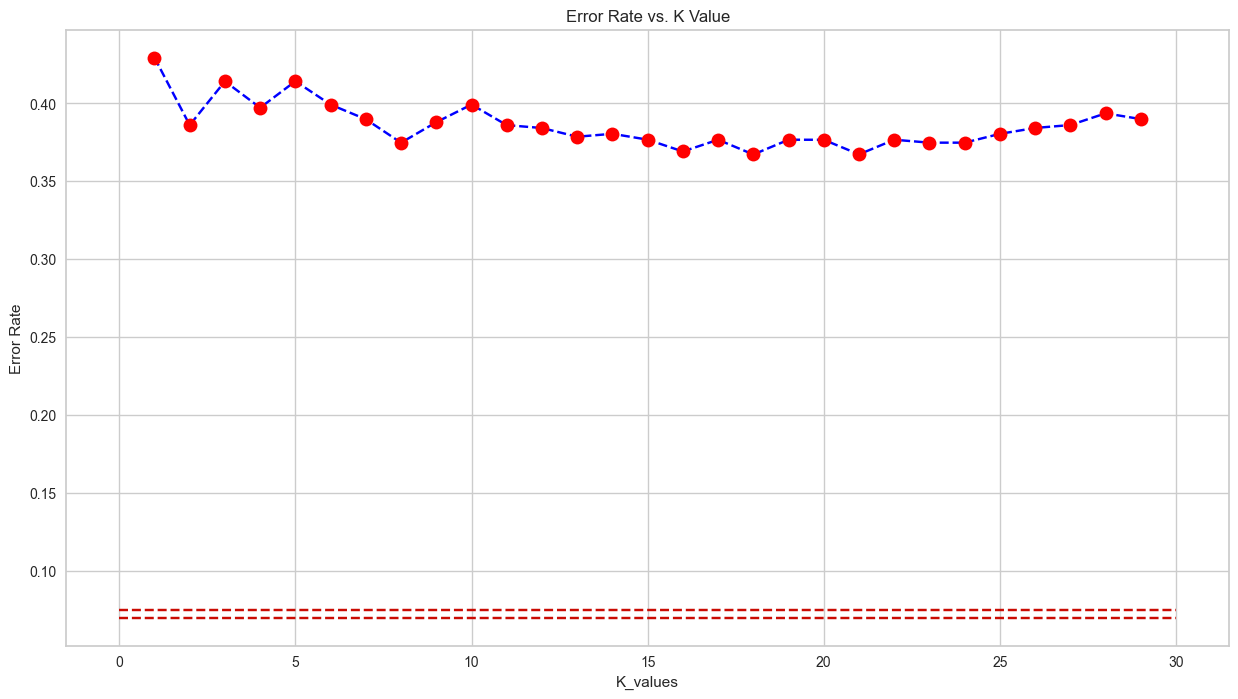

In [299]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0747, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.0699, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

# We visualize the error scores we find.

###  KNN Model Overfiting and underfiting control for k values

In [ ]:
#encoder = ColumnTransformer(
#    transformers=[  (  'ordinal'     ,encoder_ordinal , cols_categorical   )],
#    remainder='passthrough' 
#)

In [301]:
encoder = ColumnTransformer(
    transformers=[
        (  'onehot'      ,encoder_onehot  , cols_categorical  )  ],
    remainder='passthrough' 
)

In [302]:
operations=[('encoder' , encoder), ('scaler' , scaler) ,('model'  , model) ]
operations

[('encoder',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('onehot',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False),
                                   ['Gender', 'WritingPreference'])])),
 ('scaler', StandardScaler()),
 ('model', KNeighborsClassifier(n_neighbors=29))]

In [303]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    model_knn,scores=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test,verbose=False)
    #model_knn = Pipeline(steps=operations)
    #scores = cross_validate(model_knn, X_train, y_train, scoring = ['accuracy'], cv = 10,return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean()
    accuracy_train_mean = scores["train_accuracy"].mean()

    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)
# Like the same process as above.We compare the average error errors of the validation and train data
# we have obtained from the train data given in the CV
# Thus, we will be able to see more easily whether it has overfitting or not.

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ayner\.conda\env

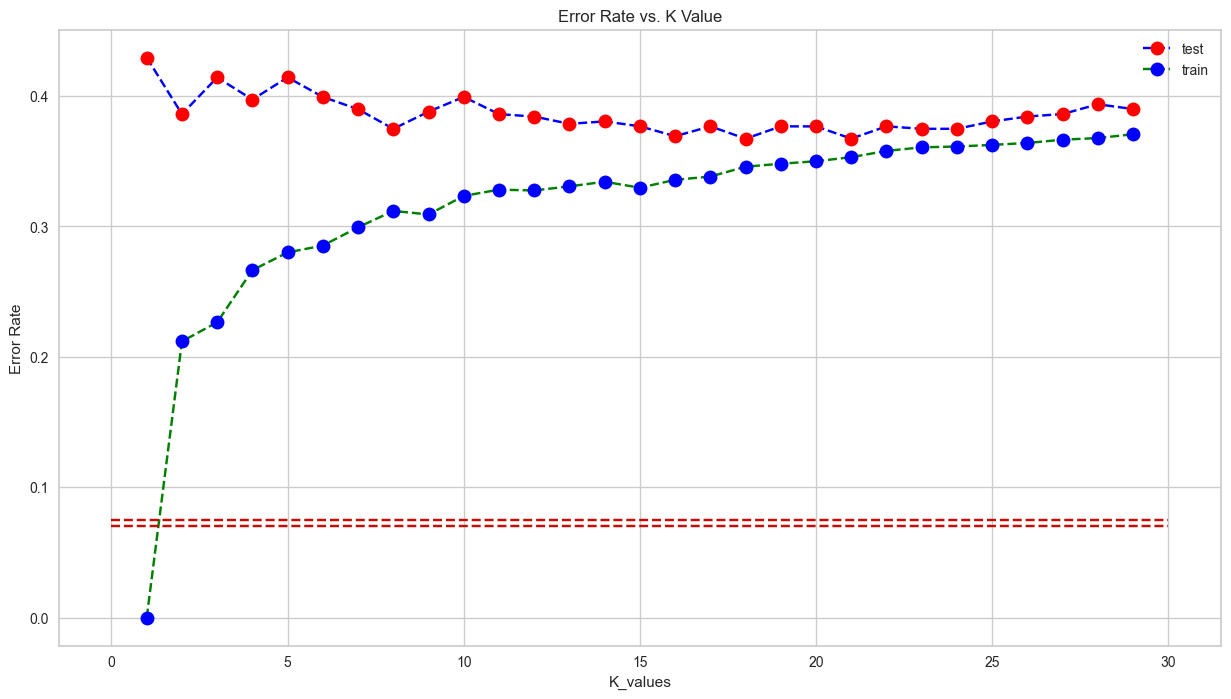

In [304]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)
plt.legend(labels=["test", "train"])

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.0747, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.0699, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

# The reds are the validation data, the blues are the scores of the train data.
# The lowest error score for the validation data was achieved at K=21,
# but if we choose 21, the complexity of the model, that is, the operation costs, MIGHT increase.
# While the error is 0.074 for K= 9, the error is 0.069 for K=21. For a difference of 0.005,
# is it worth risking the chance of increasing computational complexity?
# It's not worth the expense for a difference of 0.005.

# Keep in mind that the computational complexity of KNN wif the search algorithm is brute force is generally O(nd).
# This means, the value of k won't affect the computational complexity of the problem significantly.
# However, if the search algorithm is a tree based algorithm (kd-tree or ball-tree),
# then the value of k actually will impact the computational complexity of the model.

# At K=21, the scores are almost the same as the error scores in both validation and train data.
# However, if K=9, the error score of the validation data is 0.074, while the error score of the train data is 0.060.
# The difference is 0.014. In other words, since the difference is very small, we can choose K=9 with peace of mind.

In [338]:
model = KNeighborsClassifier(n_neighbors=14)

In [339]:
model_knn,scores=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

KNeighborsClassifier(n_neighbors=14) Model Scores:  

Test_Set
[[17  6  2]
 [ 1 64  6]
 [ 2 29  6]]
                    precision    recall  f1-score   support

Caribbean Islander       0.85      0.68      0.76        25
           Mexican       0.65      0.90      0.75        71
      Puerto Rican       0.43      0.16      0.24        37

          accuracy                           0.65       133
         macro avg       0.64      0.58      0.58       133
      weighted avg       0.62      0.65      0.61       133


Train_Set
[[ 57  29  13]
 [  5 265  16]
 [  9 107  30]]
                    precision    recall  f1-score   support

Caribbean Islander       0.80      0.58      0.67        99
           Mexican       0.66      0.93      0.77       286
      Puerto Rican       0.51      0.21      0.29       146

          accuracy                           0.66       531
         macro avg       0.66      0.57      0.58       531
      weighted avg       0.65      0.66      0.62       53

###  KNN Model GridsearchCV

In [308]:
k_values= range(1,30)
param_grid = {"model__n_neighbors":k_values,
              "model__p": [1,2],
              "model__weights": ['uniform', "distance"]}
model=KNeighborsClassifier()

In [309]:
try_model_class_in_GridSearchCV (param_grid, model,scaler,encoder, X_train, y_train, X_test, y_test)

KNeighborsClassifier(n_neighbors=18) Grid Search Model Scores:  

Test_Set
[[15  9  2]
 [ 1 66  4]
 [ 2 34  0]]
                    precision    recall  f1-score   support

Caribbean Islander       0.83      0.58      0.68        26
           Mexican       0.61      0.93      0.73        71
      Puerto Rican       0.00      0.00      0.00        36

          accuracy                           0.61       133
         macro avg       0.48      0.50      0.47       133
      weighted avg       0.49      0.61      0.52       133


Train_Set
[[ 98   0   0]
 [  0 286   0]
 [  0   0 147]]
                    precision    recall  f1-score   support

Caribbean Islander       1.00      1.00      1.00        98
           Mexican       1.00      1.00      1.00       286
      Puerto Rican       1.00      1.00      1.00       147

          accuracy                           1.00       531
         macro avg       1.00      1.00      1.00       531
      weighted avg       1.00      1.00      1

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Gender',
                                                                          'WritingPreference'])])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        KNeighborsClassifier(n_neighbors=18))]),
             param_grid={'model__n_neighbors': range(1, 30), 'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall_weighted')

###  KNN Model Evaluating ROC Curves and AUC

## 3. SVC

In [ ]:
#help(SVC)

### Vanilla SVC model

In [351]:
model = SVC(kernel='linear', C=0.1)
model_svc,scores_svc=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

SVC(C=0.1, kernel='linear') Model Scores:  

Test_Set
[[22  1  2]
 [ 1 60 10]
 [ 6 18 13]]
                    precision    recall  f1-score   support

Caribbean Islander       0.76      0.88      0.81        25
           Mexican       0.76      0.85      0.80        71
      Puerto Rican       0.52      0.35      0.42        37

          accuracy                           0.71       133
         macro avg       0.68      0.69      0.68       133
      weighted avg       0.69      0.71      0.70       133


Train_Set
[[ 92   2   5]
 [  5 255  26]
 [ 12  48  86]]
                    precision    recall  f1-score   support

Caribbean Islander       0.84      0.93      0.88        99
           Mexican       0.84      0.89      0.86       286
      Puerto Rican       0.74      0.59      0.65       146

          accuracy                           0.82       531
         macro avg       0.81      0.80      0.80       531
      weighted avg       0.81      0.82      0.81       531


SVC(C

In [ ]:
clf = SGDClassifier(n_iter=100, alpha=0.01)

###  SVC Model GridsearchCV

In [426]:
encoder_trans_onehot

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender', 'WritingPreference'])])

In [421]:
encoder=encoder_trans_onehot

In [422]:
model = SVC()
param_grid = {'model__C':[0.051],  #,1,10,1000],
              'model__kernel':['linear'],  #'linear',,'sigmoid','poly'
              'model__gamma': ["scale"], #["scale", "auto"],
              'model__degree':[3]} #[2,3]
#grid = GridSearchCV(svm,param_grid)

In [423]:
gridSearchCV_svc=try_model_class_in_GridSearchCV (param_grid, model,scaler,encoder, X_train, y_train, X_test, y_test)

SVC() Grid Search Model Scores:  

Test_Set
[[22  2  1]
 [ 1 64  6]
 [ 6 19 12]]
                    precision    recall  f1-score   support

Caribbean Islander       0.76      0.88      0.81        25
           Mexican       0.75      0.90      0.82        71
      Puerto Rican       0.63      0.32      0.43        37

          accuracy                           0.74       133
         macro avg       0.71      0.70      0.69       133
      weighted avg       0.72      0.74      0.71       133


Train_Set
[[ 90   3   6]
 [  5 258  23]
 [ 12  55  79]]
                    precision    recall  f1-score   support

Caribbean Islander       0.84      0.91      0.87        99
           Mexican       0.82      0.90      0.86       286
      Puerto Rican       0.73      0.54      0.62       146

          accuracy                           0.80       531
         macro avg       0.80      0.78      0.78       531
      weighted avg       0.80      0.80      0.80       531

{'model__C': 0.0

###  (SVC Model) GridsearchCV : ATRIBUTES

In [402]:
#gridSearchCV_svc.fit(X,y)

In [465]:
#pd.DataFrame(gridSearchCV_svc.cv_results_).loc[gridSearchCV_svc.best_index_, ["mean_test_score", "mean_train_score"]]

In [403]:
#gridSearchCV_svc.best_score_

In [404]:
#gridSearchCV_svc.best_params_

In [405]:
#gridSearchCV_svc.best_estimator_

## 4. DT

### Vanilla DT Model

In [429]:
encoder=encoder_trans_ordinal

In [434]:
model = DecisionTreeClassifier()
scoring = ["accuracy","recision_micro","recall_micro", "f1_micro"],
model_dt,scores_dt=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

DecisionTreeClassifier() Model Scores:  

Test_Set
[[15  5  5]
 [ 4 50 17]
 [ 3 21 13]]
                    precision    recall  f1-score   support

Caribbean Islander       0.68      0.60      0.64        25
           Mexican       0.66      0.70      0.68        71
      Puerto Rican       0.37      0.35      0.36        37

          accuracy                           0.59       133
         macro avg       0.57      0.55      0.56       133
      weighted avg       0.58      0.59      0.58       133


Train_Set
[[ 99   0   0]
 [  0 286   0]
 [  0   0 146]]
                    precision    recall  f1-score   support

Caribbean Islander       1.00      1.00      1.00        99
           Mexican       1.00      1.00      1.00       286
      Puerto Rican       1.00      1.00      1.00       146

          accuracy                           1.00       531
         macro avg       1.00      1.00      1.00       531
      weighted avg       1.00      1.00      1.00       531


Decision

### DT Model Evaluating ROC Curves and AUC

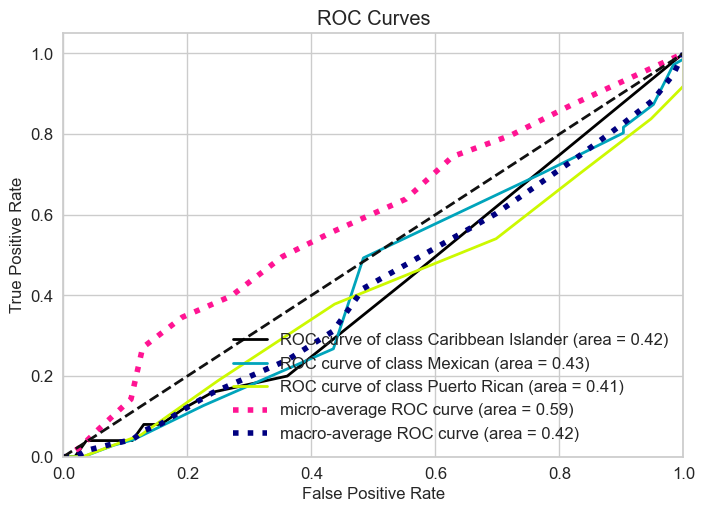

In [438]:
y_pred_proba_dt = model_dt.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show()

In [ ]:
#PrecisionRecallDisplay.from_estimator(model_dt, X_test, y_test);   binary target varsa kullanilir

###  (DT Model) PIPELINE : ATRIBUTES

In [443]:
#features = model_dt["encoder"].get_feature_names_out()
#features 

In [444]:
#model_dt["encoder"].fit_transform(X_train).head()

In [447]:
# df_f_i = pd.DataFrame(data=model_dt["model"].feature_importances_,
#                       index=features, #index=X.columns
#                       columns=["Feature Importance"])

# df_f_i = df_f_i.sort_values("Feature Importance", ascending=False)
# df_f_i

## We defined the df that shows the featue importance ratios as df_f_i.
## With pipe_model["DT_model"].feature_importances_ in the df, we define feature importance ratios,
## feature names (features) whose order changes after make_column_transform to the index.
## Then we sort the feature importance values from largest to smallest.

In [449]:
# ax = sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
# ax.bar_label(ax.containers[0],fmt="%.3f");
# plt.xticks(rotation = 90)
# plt.show();

# # We visualize feature importance values with barplot.
# # When making feature selection, we do it according to the order here.

In [454]:
# # We will visualize trees to better understand the DT hyper_ parameters.

# plt.figure(figsize=(12,8), dpi=75)
# plot_tree(model_dt["model"], fontsize=10);

# # When we insert the model into plot_tree, it shows us which featurs the leaf splits
# # take place in which value ranges. In order to better understand the image,
# # we need to define the feature names and class names.

In [ ]:
#pd.set_option('display.max_rows', 500)

In [ ]:
# X.columns
# features
# y.unique()

In [456]:
# plt.figure(figsize=(12,10),dpi=100)
# plot_tree(model_dt["model"],
#           filled=True,
#           feature_names=features.tolist(),
#           class_names=y.unique().tolist(),
#           fontsize=7);

# We made the image more readable by defining features_names and class names.
# Since we use make_column_transform, we keep in mind that the features names are in the new feature order.

# The lower the gini value, the more observations of a similar class are present in that leaf.
# If gini is 0, it indicates that all observations in that leaf belong to the same class.
# the max gini value on a sheet can be 1-1/n (n=class number). The maximum value for this data can be 1-1/3=0.67.
# The max gini value indicates that there are plenty of observations from each class.

# Since the splitter condition of the leaves in the DT model is made according to the best feature by default,
# in this image the flipper_length_mm feature, which contributes the most to the prediction of the first leaf model.
# shows the total number of observations in the samples train data on the first sheet,
# and value shows how many observations are from which class according to the alphabetic/numeric order of the classes.

# Number of samples on other leaves shows how many observations fell on that leaf after division,
# and value shows how many observations from which class.

# class indicates which class the model will assign the observations falling on that leaf
# (it also defines the majority class falling on that leaf).

### DT Model Hyperparameter : Criterion : gini, entropy

In [466]:
model = DecisionTreeClassifier(criterion='entropy', random_state=101)
scoring = ["accuracy","recision_micro","recall_micro", "f1_micro"]
model_dt_entropy,scores_dt_entropy=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

# We specify whether gini or entropy values should be taken into account for the division criterion.
# We can use both as well. If we do not impose any constraints on the model,
# it will continue to divide until the value of gini or entropy is 0.
# maximum log2(n) (number of n:classes) while entropy min takes 0 value. The maximum entropy value for our data is log2(3) = 1.585
# max 1-1/n (number of n:classes) while gini takes a min 0 value. The max gini value for our data is 1-1/3 = 0.67
# default is gini.

DecisionTreeClassifier(criterion='entropy', random_state=101) Model Scores:  

Test_Set
[[18  4  3]
 [ 6 43 22]
 [ 7 16 14]]
                    precision    recall  f1-score   support

Caribbean Islander       0.58      0.72      0.64        25
           Mexican       0.68      0.61      0.64        71
      Puerto Rican       0.36      0.38      0.37        37

          accuracy                           0.56       133
         macro avg       0.54      0.57      0.55       133
      weighted avg       0.57      0.56      0.57       133


Train_Set
[[ 99   0   0]
 [  0 286   0]
 [  0   0 146]]
                    precision    recall  f1-score   support

Caribbean Islander       1.00      1.00      1.00        99
           Mexican       1.00      1.00      1.00       286
      Puerto Rican       1.00      1.00      1.00       146

          accuracy                           1.00       531
         macro avg       1.00      1.00      1.00       531
      weighted avg       1.00    

### DT Model GridsearchCV

In [457]:
model=DecisionTreeClassifier(random_state=101)

In [458]:
#scoring=['accuracy', 'recision_micro', 'recall_micro', 'f1_micro']


(['accuracy', 'recision_micro', 'recall_micro', 'f1_micro'],)

In [461]:
scoring='f1_micro'

param_grid = {"model__splitter":["best", "random"],
              "model__max_features":[None, "auto", "log2", 2, 3,4, 5,6, 7],
              "model__max_depth": [None, 2, 3, 4, 5],
              "model__min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
              "model__min_samples_split": [2, 3, 5, 6, 7,8,9]}

In [462]:
gridSearchCV_dt=try_model_class_in_GridSearchCV (param_grid, model,scaler,encoder, X_train, y_train, X_test, y_test,scoring)

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
2450 fits failed out of a total of 22050.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_par

DecisionTreeClassifier(random_state=101) Grid Search Model Scores:  

Test_Set
[[ 9 13  3]
 [ 3 65  3]
 [ 2 34  1]]
                    precision    recall  f1-score   support

Caribbean Islander       0.64      0.36      0.46        25
           Mexican       0.58      0.92      0.71        71
      Puerto Rican       0.14      0.03      0.05        37

          accuracy                           0.56       133
         macro avg       0.46      0.43      0.41       133
      weighted avg       0.47      0.56      0.48       133


Train_Set
[[ 47  48   4]
 [ 16 266   4]
 [ 16 120  10]]
                    precision    recall  f1-score   support

Caribbean Islander       0.59      0.47      0.53        99
           Mexican       0.61      0.93      0.74       286
      Puerto Rican       0.56      0.07      0.12       146

          accuracy                           0.61       531
         macro avg       0.59      0.49      0.46       531
      weighted avg       0.59      0.61   

## 5. RF

### Vanilla RF Model

In [471]:
model=RandomForestClassifier(random_state=101,class_weight="balanced")

In [472]:
model_rf,scores_rf=try_model_class(model,scaler,encoder, X_train, y_train, X_test, y_test)

RandomForestClassifier(class_weight='balanced', random_state=101) Model Scores:  

Test_Set
[[18  4  3]
 [ 0 69  2]
 [ 3 32  2]]
                    precision    recall  f1-score   support

Caribbean Islander       0.86      0.72      0.78        25
           Mexican       0.66      0.97      0.78        71
      Puerto Rican       0.29      0.05      0.09        37

          accuracy                           0.67       133
         macro avg       0.60      0.58      0.55       133
      weighted avg       0.59      0.67      0.59       133


Train_Set
[[ 99   0   0]
 [  0 286   0]
 [  0   0 146]]
                    precision    recall  f1-score   support

Caribbean Islander       1.00      1.00      1.00        99
           Mexican       1.00      1.00      1.00       286
      Puerto Rican       1.00      1.00      1.00       146

          accuracy                           1.00       531
         macro avg       1.00      1.00      1.00       531
      weighted avg       1.00

C:\Users\ayner\.conda\envs\ds\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



RandomForestClassifier(class_weight='balanced', random_state=101) Model Cross Validate Scores:   
 test_accuracy              0.61761
train_accuracy             1.00000
test_precision_weighted    0.51321
train_precision_weighted   1.00000
test_recall_weighted       0.61761
train_recall_weighted      1.00000
test_f1_weighted           0.53224
train_f1_weighted          1.00000
dtype: float64


### RF Model GridsearchCV

In [474]:
param_grid = {'model__n_estimators':[64, 128, 200],
             'model__max_features':[2, 4, 'sqrt'],
             'model__max_depth':[2, 3, 4],
             'model__min_samples_split':[2, 3,4],
             'model__min_samples_leaf': [2,3,4],
             'model__max_samples':[0.8, 1]} # add 1

In [478]:
model = RandomForestClassifier(class_weight={'Caribbean Islander':3, 'Mexican':1,'Puerto Rican':4},
                               random_state=101)
# It is weighted 1 to 4 because class_weight="balanced" was insufficient.

In [ ]:
gridSearchCV_dt=try_model_class_in_GridSearchCV (param_grid, model,scaler,encoder, X_train, y_train, X_test, y_test,scoring)

## 6. XGBoost

### Vanilla XGBoost Model

### XGBoost Model GridsearchCV

---
---

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

## Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Logistic Regression Over/ Under Sampling

#  SHAP
- http://archive.today/2024.02.04-155206/https://towardsdatascience.com/shapley-values-clearly-explained-a7f7ef22b104
- https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7